In [1]:
# Importing dependecies:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import os

# Configuring Notebook environment:
sns.set()
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.rcParams['figure.figsize'] = (10.0, 7.5)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
# Importing documents:
df = pd.read_csv('cj_single_view.csv', index_col=0, low_memory=False)
df.head()

//anaconda3/envs/Springboard/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,PRODUCT_ID,STORE_ID,WEEK_NO,display,mailer,household_key,BASKET_ID,DAY,QUANTITY,SALES_VALUE,RETAIL_DISC,TRANS_TIME,COUPON_DISC,COUPON_MATCH_DISC,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,COUPON_UPC,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,affinity_raw,affinity_rank_pct,affinity_rank_centered,affinity_log,affinity_log_scaled,affinity_rank_buckets,affinity_score
0,818980,367,63,4,0,883,33385517013,434,1.0,0.67,-0.22,1252,0,0,TypeA,26,224,264,1251,GROCERY,National,BEANS - CANNED GLASS & MW,PREPARED BEANS - BAKED W/PORK,15.75 OZ,NaN,35-44,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,0.67,0.048787,-0.907653,-0.400478,0.309007,1,1
1,818980,367,63,4,0,883,33385517013,434,1.0,0.67,-0.22,1252,0,0,TypeA,30,323,369,1251,GROCERY,National,BEANS - CANNED GLASS & MW,PREPARED BEANS - BAKED W/PORK,15.75 OZ,NaN,35-44,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,0.67,0.048787,-0.907653,-0.400478,0.309007,1,1
2,818980,367,63,4,0,883,33385517013,434,1.0,0.67,-0.22,1252,0,0,TypeA,8,412,460,1251,GROCERY,National,BEANS - CANNED GLASS & MW,PREPARED BEANS - BAKED W/PORK,15.75 OZ,NaN,35-44,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,0.67,0.048787,-0.907653,-0.400478,0.309007,1,1
3,818980,367,63,4,0,883,33385517013,434,1.0,0.67,-0.22,1252,0,0,TypeA,13,504,551,1251,GROCERY,National,BEANS - CANNED GLASS & MW,PREPARED BEANS - BAKED W/PORK,15.75 OZ,NaN,35-44,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,0.67,0.048787,-0.907653,-0.400478,0.309007,1,1
4,818980,367,63,4,0,883,33385517013,434,1.0,0.67,-0.22,1252,0,0,TypeA,18,587,642,1251,GROCERY,National,BEANS - CANNED GLASS & MW,PREPARED BEANS - BAKED W/PORK,15.75 OZ,NaN,35-44,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,0.67,0.048787,-0.907653,-0.400478,0.309007,1,1


In [3]:
print('Dataset headers:', df.columns)

# Changing columns names to lower case for uniformity:
df.columns = map(str.lower, df.columns)
print('Lowercase headers:', df.columns)

Dataset headers: Index(['PRODUCT_ID', 'STORE_ID', 'WEEK_NO', 'display', 'mailer',
       'household_key', 'BASKET_ID', 'DAY', 'QUANTITY', 'SALES_VALUE',
       'RETAIL_DISC', 'TRANS_TIME', 'COUPON_DISC', 'COUPON_MATCH_DISC',
       'DESCRIPTION', 'CAMPAIGN', 'START_DAY', 'END_DAY', 'MANUFACTURER',
       'DEPARTMENT', 'BRAND', 'COMMODITY_DESC', 'SUB_COMMODITY_DESC',
       'CURR_SIZE_OF_PRODUCT', 'COUPON_UPC', 'AGE_DESC', 'MARITAL_STATUS_CODE',
       'INCOME_DESC', 'HOMEOWNER_DESC', 'HH_COMP_DESC', 'HOUSEHOLD_SIZE_DESC',
       'KID_CATEGORY_DESC', 'affinity_raw', 'affinity_rank_pct',
       'affinity_rank_centered', 'affinity_log', 'affinity_log_scaled',
       'affinity_rank_buckets', 'affinity_score'],
      dtype='object')
Lowercase headers: Index(['product_id', 'store_id', 'week_no', 'display', 'mailer',
       'household_key', 'basket_id', 'day', 'quantity', 'sales_value',
       'retail_disc', 'trans_time', 'coupon_disc', 'coupon_match_disc',
       'description', 'campaign', '

In [8]:
df.info()

# Changing classification of object types to lower memory usage:
df[['display', 'mailer', 'description', 'department', 'brand', 'age_desc', 'marital_status_code', 
    'income_desc', 'homeowner_desc', 'hh_comp_desc', 'household_size_desc', 'kid_category_desc']] = df[['display', 
    'mailer', 'description', 'department', 'brand', 'age_desc', 'marital_status_code', 
    'income_desc', 'homeowner_desc', 'hh_comp_desc', 'household_size_desc', 'kid_category_desc']].astype('category')
df[['commodity_desc', 'sub_commodity_desc', 'curr_size_of_product']] = df[['commodity_desc', 
    'sub_commodity_desc', 'curr_size_of_product']].astype(str)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2993709 entries, 0 to 2993708
Data columns (total 39 columns):
product_id                int64
store_id                  int64
week_no                   int64
display                   category
mailer                    category
household_key             int64
basket_id                 int64
day                       int64
quantity                  float64
sales_value               float64
retail_disc               float64
trans_time                int64
coupon_disc               int64
coupon_match_disc         int64
description               category
campaign                  int64
start_day                 int64
end_day                   int64
manufacturer              int64
department                category
brand                     category
commodity_desc            object
sub_commodity_desc        object
curr_size_of_product      object
coupon_upc                float64
age_desc                  category
marital_status_code       

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2993709 entries, 0 to 2993708
Data columns (total 39 columns):
product_id                int64
store_id                  int64
week_no                   int64
display                   category
mailer                    category
household_key             int64
basket_id                 int64
day                       int64
quantity                  float64
sales_value               float64
retail_disc               float64
trans_time                int64
coupon_disc               int64
coupon_match_disc         int64
description               category
campaign                  int64
start_day                 int64
end_day                   int64
manufacturer              int64
department                category
brand                     category
commodity_desc            object
sub_commodity_desc        object
curr_size_of_product      object
coupon_upc                float64
age_desc                  category
marital_status_code       

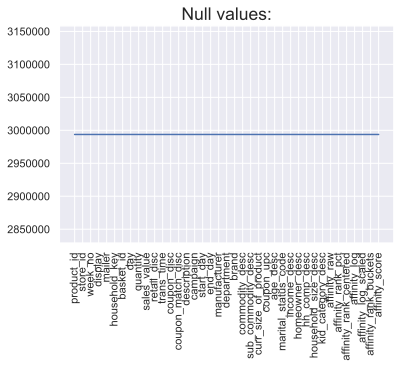

In [12]:
plt.plot(df.isnull().count())
plt.title('Null values:', size=17.5)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Analizing if some products are more purchased more often than others:
_ = sns.countplot(x='income_desc', data=df, hue='age_desc', order=df['income_desc'].value_counts().index)
_ = plt.title('Relationship between age and income:', size=20)
_ = plt.xlabel('Income Groups')
_ = plt.ylabel('Total Amount')
_ = plt.xticks(rotation=80)
_ = plt.legend(loc='upper right')
plt.show()

In [ ]:
# Comparing which age group uses more coupons:
# sorted_income = ['Under 15K', '15-24K', '25-34K', '35-49K', '50-74K', '75-99K', '100-124K', '125-149K', '150-174K', '175-199K', '200-249K', '250K+']

df_35_44 = pd.DataFrame(df[df['age_desc'] == '35-44'])
# df_35_44['income_desc'] = pd.Categorical(df['income_desc'], sorted_income)
# df_35_44.sort_values('income_desc', ascending=False, axis=0, inplace=True)
df_45_54 = pd.DataFrame(df[df['age_desc'] == '45-54'])

plt.figure(figsize=(10, 7.5))
plt.subplot(2, 1, 1)
_ = sns.countplot(df_35_44['income_desc'])
_ = plt.title('Age Range Between 35-44:', size=15)
_ = plt.xlabel('Income Ranges')
_ = plt.ylabel('Total Amount')
_ = plt.xticks(rotation=75)

plt.subplot(2, 1, 2)
_ = sns.countplot(df_45_54['income_desc'])
_ = plt.title('Age Range Between 45-54:', size=15)
_ = plt.xlabel('Income Ranges')
_ = plt.ylabel('Total Amount')
_ = plt.xticks(rotation=75)

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 7.5))
ax = sns.countplot(df['income_desc'])
_ = plt.title('Distribution of coupons used based on age range:', size=20)
_ = plt.xlabel('Income Ranges')
_ = plt.ylabel('Total Amount')
_ = plt.xticks(rotation=75)

# https://stackoverflow.com/questions/33179122/seaborn-countplot-with-frequencies/33259038
for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100. * y / len(df)), (x.mean(), y), ha='center', va='bottom') # set the alignment of the text

In [ ]:
plt.figure(figsize=(10, 7.5))
sns.heatmap(df_35_44.drop(['coupon_upc'], axis=1))

In [ ]:
df_35_44.info()